- 均值类
1. 正态检验
2. 样本量估计
3. 测试完成后的合理性检验
   - 实验/对照组的样本量比例检验：假如测试完成后，样本量比例不是1:1，怎么判断实际比例是否属于可接受的波动
   - 特征分布是否均匀：辛普森悖论
3. 结果检验 T检验 返回p值；怎么计算置信区间

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize as es 
from scipy.stats import ttest_ind,norm,f
import statsmodels.stats.weightstats as sw


In [3]:
data = {'avg_cnt':[11.077378,8.398665,8.571959,8.283145,5.93106,7.453807,9.184988,7.755004,8.438116,9.159712,6.773043,8.315689,7.682243,7.343689,8.982294,7.653003,7.419295,8.419876,6.440056,7.040037,9.724157,8.956077,8.760673,9.226514,6.82048,5.025931,6.90876,8.110434,6.430384,8.037746]}
df = pd.DataFrame(data)

In [5]:
# 检验数据是否符合正态分布：有多种方法，每种方法适用数据量不同
# 统计量越接近1表明数据和正态分布拟合的越好，p值大于0.05表示样本服从正态分布
print(stats.shapiro(df))  
print(stats.normaltest(df))

ShapiroResult(statistic=0.9872630834579468, pvalue=0.9692407846450806)
NormaltestResult(statistic=array([0.90757086]), pvalue=array([0.63521902]))


In [6]:
# 样本量计算，也可以用 8 * 综合方差 / 提升值的平方  ？两种方法算出来的样本量差别很大
print("标准差：",np.std(df))
print("均值：",np.mean(df))
print("提升量：",np.mean(df)*0.02)  # 0.02是自己定的提升比例，实际可以参考业务历史数据设定
tt_ind_solve_power(effect_size=(0.158883)/1.217752, alpha=0.05, power=0.8, ratio=1.0, alternative="two-sided")


标准差： avg_cnt    1.217752
dtype: float64
均值： avg_cnt    7.94414
dtype: float64
提升量： avg_cnt    0.158883
dtype: float64


923.1068496018379

In [10]:
# 结果检验
# data1为新版本数据，data2为老版本数据
data_af = pd.DataFrame(
    {
    'data1':[5.679312,5.596886,6.044847,5.994368,7.532478,5.922314,4.296232,4.188054,3.777318,8.253483,7.114997,6.82596,7.213144,4.213463],
    'data2':[6.150766,4.026921,8.072727,8.764057,6.079969,5.504954,7.113292,6.33763,4.940921,6.367048,7.244069,6.365149,7.964037,3.840968]
    }
    )

def ftest(s1,s2):
    '''F检验：验证两组结果总体方差是否相等'''
    print("Null Hypothesis:var(s1)=var(s2)，α=0.05")
    F = np.var(s1)/np.var(s2)
    v1 = len(s1) - 1
    v2 = len(s2) - 1
    p_val = 1 - 2*abs(0.5-f.cdf(F,v1,v2))
    print('p_val：%.4f' %p_val)
    if p_val < 0.05:
        print("Reject the Null Hypothesis.")
        equal_var=False
    else:
        print("Accept the Null Hypothesis.")
        equal_var=True
    return equal_var

def ttest_ind_fun(s1,s2):
    '''t检验独立样本所代表的两个总体均值是否存在差异'''
    equal_var = ftest(s1,s2)
    print("Null Hypothesis:mean(s1)=mean(s2)，α=0.05")
    ttest,pval = ttest_ind(s1,s2,equal_var=equal_var) #如果equal_var为True（默认），则执行一个标准的独立2样本检验，该检验假设总体方差相等[1]。如果为False，则执行Welch的t检验，该检验不假定总体方差相等
    if pval < 0.05:
        print("Reject the Null Hypothesis.")
    else:
        print("Accept the Null Hypothesis.")
    print('p_val：%.4f' %pval)

ttest_ind_fun(data_af['data1'],data_af['data2'])


Null Hypothesis:var(s1)=var(s2)，α=0.05
p_val：0.8929
Accept the Null Hypothesis.
Null Hypothesis:mean(s1)=mean(s2)，α=0.05
Accept the Null Hypothesis.
p_val：0.4234


- 比例类
1. 样本量计算
2. 测试完成后的合理性检验 同上
3. 结果检验 z检验

In [11]:
data = {
    "ratio":[0.211249,0.217914,0.22124,0.20922,0.214652,0.207703,0.187119,0.204098,0.20032,0.203912,0.211707,0.205356,0.222301,0.206412,0.214494]
}
df =pd.DataFrame(data) 

In [12]:
# 样本量计算 
print("平均转化率：",df['ratio'].mean())
print("转化率提升5%：",df['ratio'].mean()*0.05)
print("转化率提升5%后：",df['ratio'].mean()*1.05)
tt_ind_solve_power(effect_size=es(prop1=0.2091798, prop2=0.21963879), alpha=0.05, power=0.8, ratio=1.0, alternative="two-sided")


平均转化率： 0.20917979999999997
转化率提升5%： 0.01045899
转化率提升5%后： 0.21963878999999997


24168.887475377924

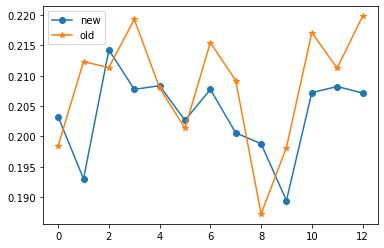

In [16]:
# 结果检验
data_df={
    'ratio_new':[0.20324,0.19301,0.21427,0.20777,0.20836,0.20266,0.207759,0.200588,0.198808,0.189438,0.207227,0.20823,0.207167],
    'ratio_old':[0.198468,0.212332,0.211364,0.219309,0.207997,0.201348,0.21549,0.209222,0.187228,0.198169,0.217129,0.211271,0.21982]
}
df_af = pd.DataFrame(data_df)

plt.plot(df_af['ratio_new'],marker = 'o',label = 'new')
plt.plot(df_af['ratio_old'],marker = '*',label = 'old')
plt.legend()


In [17]:
z_value, p_value = sw.ztest(df_af['ratio_new'],df_af['ratio_old'],alternative='two-sided')
print('统计量：',z_value)
print('P值：',p_value)

统计量： -1.4232640324468777
P值： 0.15465962942318698
